# 사이킷런 Wrapper XGBoost 개요 및 적용 
Boosting 이란?
- 여러 개의 약한 의사결정나무(Decision Tree)를 조합해서 사용하는 앙상블(Ensemble) 기법 중 하나
즉, 약한 예측 모형들의 학습 에러에 가중치를 두고, 순차적으로 다음 학습 모델에 반영하여 강한 예측모형을 만든다.

XGBoost 란?
- XGBoost는 Extreme Gradient Boosting의 약자이다. 해석하면 극한 변화도(경사도) 부스팅
- Boosting 기법을 이용하여 구현한 알고리즘은 Gradient Boost 가 대표적
- 이 알고리즘을 병렬 학습이 지원되도록 구현한 라이브러리가 XGBoost 이다.
- Regression, Classification 문제를 모두 지원하며, 성능과 자원 효율이 좋아서, 인기 있게 사용되는 알고리즘 이다.

XGBoost의 장점
- GBM 대비 빠른 수행시간
- 병렬 처리로 학습, 분류 속도가 빠르다.
- 과적합 규제(Regularization)
- 표준 GBM 경우 과적합 규제기능이 없으나, XGBoost는 자체에 과적합 규제 기능으로 강한 내구성 지닌다.
- 분류와 회귀영역에서 뛰어난 예측 성능 발휘
- 즉, CART(Classification and regression tree) 앙상블 모델을 사용
- Early Stopping(조기 종료) 기능이 있음
- 다양한 옵션을 제공하며 Customizing이 용이하다.
- Missing Values : 결측치를 내부적으로 처리해준다. 실제로 kaggle에 적용해보는 과정에서 편리함


In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer  # 유방암 데이터
from sklearn.model_selection import train_test_split


dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data = X_features, columns = dataset. feature_names)
cancer_df['target'] = y_label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

=> malignant : 양성 종양인지 악성 종양인지 분류하는 데이터 (0 : 악성, 1 : 양성) 

In [13]:
print(dataset.target_names)
cancer_df.target.value_counts()

['malignant' 'benign']


1    357
0    212
Name: target, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state = 156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_(y_test, pred, predict_proba):
    accuracy = accuracy_score(y_test, pred)
    confusion = confusion_matrix(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, predict_proba)
    print('오차행렬', '\n')
    print(confusion)
    print(f'정확도: {accuracy:.3f}, 정밀도: {precision:.3f}, 재현율: {recall : .3f}, F1: {f1: .3f}, AUC: {auc}')


In [15]:
!pip install xgboost

In [20]:
from xgboost import XGBClassifier
evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds =400, eval_set = evals, eval_metric = 'logloss', verbose=True)
w_preds = xgb_wrapper.predict(X_test) 
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[52]	validation_0-logloss:0.08958
[53]	validation_0-logloss:0.09070
[54]	validation_0-logloss:0.08958
[55]	validation_0-logloss:0.09036
[56]	validation_0-logloss:0.09159
[57]	validation_0-logloss:0.09153
[58]	validation_0-logloss:0.09199
[59]	validation_0-logloss:0.09195
[60]	validation_0-logloss:0.09194
[61]	validation_0-logloss:0.09146
[62]	validation_0-logloss:0.09031
[63]	validation_0-logloss:0.08941
[64]	validation_0-logloss:0.08972
[65]	validation_0-logloss:0.08974
[66]	validation_0-logloss:0.08962
[67]	validation_0-logloss:0.08873
[68]	validation_0-logloss:0.08862
[69]	validation_0-logloss:0.08974
[70]	validation_0-logloss:0.08998
[71]	validation_0-logloss:0.08978
[72]	validation_0-logloss:0.08958
[73]	validation_0-logloss:0.08953
[74]	validation_0-logloss:0.08875
[75]	validation_0-logloss:0.08860
[76]	validation_0-logloss:0.08812
[77]	validation_0-logloss:0.08840
[78]	validation_0-logloss:0.08874
[79]	validation_0-logloss:0.08815
[80]	validation_0-logloss:0.08758
[81]	validatio

[288]	validation_0-logloss:0.08637
[289]	validation_0-logloss:0.08646
[290]	validation_0-logloss:0.08645
[291]	validation_0-logloss:0.08632
[292]	validation_0-logloss:0.08628
[293]	validation_0-logloss:0.08615
[294]	validation_0-logloss:0.08620
[295]	validation_0-logloss:0.08622
[296]	validation_0-logloss:0.08631
[297]	validation_0-logloss:0.08618
[298]	validation_0-logloss:0.08626
[299]	validation_0-logloss:0.08613
[300]	validation_0-logloss:0.08618
[301]	validation_0-logloss:0.08605
[302]	validation_0-logloss:0.08602
[303]	validation_0-logloss:0.08610
[304]	validation_0-logloss:0.08598
[305]	validation_0-logloss:0.08606
[306]	validation_0-logloss:0.08597
[307]	validation_0-logloss:0.08600
[308]	validation_0-logloss:0.08600
[309]	validation_0-logloss:0.08588
[310]	validation_0-logloss:0.08592
[311]	validation_0-logloss:0.08595
[312]	validation_0-logloss:0.08603
[313]	validation_0-logloss:0.08611
[314]	validation_0-logloss:0.08599
[315]	validation_0-logloss:0.08590
[316]	validation_0-l

In [23]:
get_clf_(y_test, w_preds, w_pred_proba)

오차행렬 

[[35  2]
 [ 1 76]]
정확도: 0.974, 정밀도: 0.974, 재현율:  0.987, F1:  0.981, AUC: 0.995085995085995


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

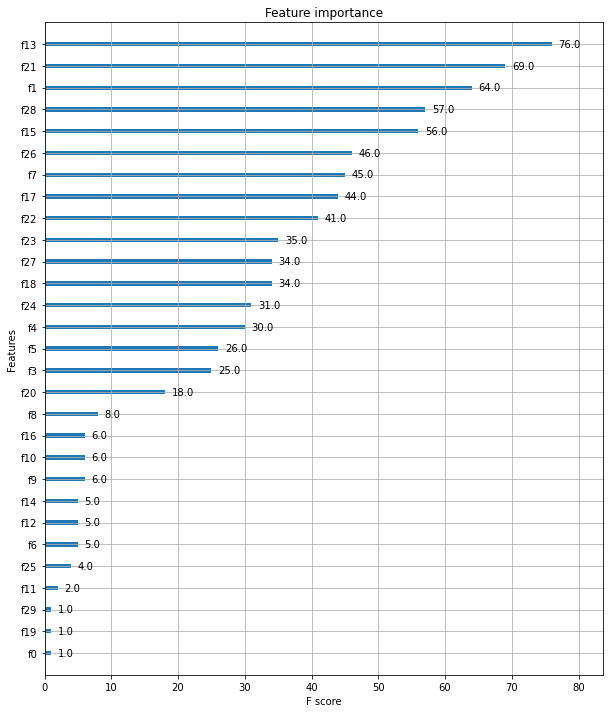

In [29]:
from xgboost import plot_importance # 피처의 중요도를 시각화해주는 모듈
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(xgb_wrapper, ax=ax) # 피처의 데이터 세트가 numpy  여서 y축에 피처명 대신 f + 숫자 로 나타남

In [24]:
!pip install lightgbm

#### 과제_0921_3
LightGBM을 이용하여 위스콘신 유방암 모델을 생성하고 평가 및 변수 중요도를 시각화하세요.

In [31]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer  # 유방암 데이터
from sklearn.model_selection import train_test_split


dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data = X_features, columns = dataset. feature_names)
cancer_df['target'] = y_label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [37]:
from lightgbm import LGBMClassifier

# 평가 지표 구하는 함수 생성
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

def get_clf_eval(y_test, predict, predict_proba):
    accuracy = accuracy_score(y_test, predict)
    confusion = confusion_matrix(y_test, predict)
    precision = precision_score(y_test, predict)
    recall = recall_score(y_test, predict)
    f1 = f1_score(y_test, predict)
    auc = roc_auc_score(y_test, predict_proba)
    print('오차행렬')
    print(confusion)
    print(f'정확도: {accuracy:.3f}, 정밀도: {precision:.3f}, 재현율: {recall: .3f}, f1: {f1:.3f}, AUC: {auc:.3f}')

In [34]:
# 훈련용, 테스트용 분류
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state = 156)

# 훈련용을 다시 쪼개서 90%는 학습, 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

# n_estimators (하이퍼파라미터) 설정하여 LGB 적용
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate = 0.05) #학습률을 작게하고 트리 개수를 크게 지정할 수록 예측성능이 향상(but 과적합, 시간소요 고려)

# 조기중단 수행 적용하여 훈련
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, 
                 eval_metric="logloss", eval_set = evals, verbose = True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

[109]	training's binary_logloss: 0.00915965	valid_1's binary_logloss: 0.280752
[110]	training's binary_logloss: 0.00882581	valid_1's binary_logloss: 0.282152
[111]	training's binary_logloss: 0.00850714	valid_1's binary_logloss: 0.280894


=> 조기중단으로 111번 반복까지만 수행하고 학습 종료 

In [38]:
# 평가 적용
get_clf_eval(y_test, preds , pred_proba)

오차행렬
[[34  3]
 [ 2 75]]
정확도: 0.956, 정밀도: 0.962, 재현율:  0.974, f1: 0.968, AUC: 0.988


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

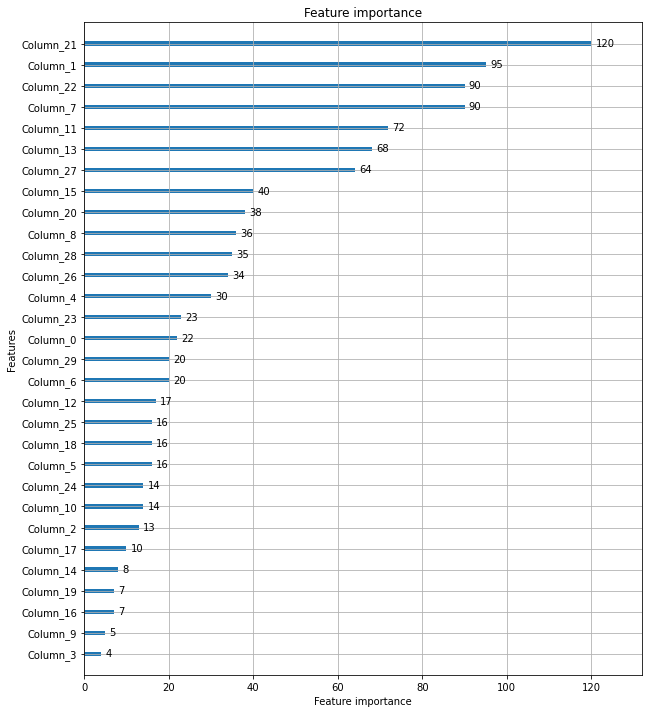

In [39]:
# 피처 중요도 시각화
from lightgbm import plot_importance 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize =(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

In [ ]:
[도전과제]. 캐글 산탄데르 고객 만족 예측

In [ ]:
# TARGET열은 예측할 변수 / 불만족:1, 만족:0
# test 세트의 각 고객이 불만족스러운 고객일 확률을 예측하는 자료
# 구성 파일 : test, train, sample_submission(샘플)

### 1. 데이터 확인

In [1]:
import pandas as pd

df_test = pd.read_csv('test.csv')
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [2]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.0 MB


In [3]:
df_train = pd.read_csv('train.csv')
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [5]:
df_train.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

=> 'TARGET' 이 종속, 나머지 컬럼 370개

-> 대부분이 만족이고 일부가 불만족일거라 roc_auc 로 성능 평가

In [6]:
df_train.shape

(76020, 371)

In [7]:
# null값 확인
df_train.isnull().sum().sum()

0

In [8]:
# 만족과 불만족 비율 확인
df_train['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [9]:
df_train['TARGET'].value_counts()[1]/df_train['TARGET'].value_counts().sum()

0.0395685345961589

=> 불만족 비율 약 0.04 

In [10]:
df_train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


=> var3의 min값이 -9999999가 나옴 (특정 값 찾기

In [11]:
df_train[df_train['var3']==-999999].count()

ID                         116
var3                       116
var15                      116
imp_ent_var16_ult1         116
imp_op_var39_comer_ult1    116
                          ... 
saldo_medio_var44_hace3    116
saldo_medio_var44_ult1     116
saldo_medio_var44_ult3     116
var38                      116
TARGET                     116
Length: 371, dtype: int64

=> -99999인 값 총 116개 나옴.... (가장 많이 나온 2로 대체)

### 데이터 전처리

In [12]:
# 2로 특정 값 대체
df_train['var3'].replace(-999999, 2, inplace=True)

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# 클래스 데이터와 피처 데이트 세트를 분류

X_features = df_train.iloc[:, 1:-1] # ID컬럼 제외(단순 식별자)
y_labels = df_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

# TARGET값이 학습용과 테스트용 에 모두 비슷하게 나뉘었는지 확인

train_cnt = y_train.count()
test_cnt = y_test.count()
print(f'학습 세트 shape: {X_train.shape}, 테스트 세트 shape: {X_test.shape}')

print('훈련 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt, '\n')
print('테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 shape: (60816, 369), 테스트 세트 shape: (15204, 369)
훈련 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64 

테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


=> 원본 데이터의 비율과 거의 동일

In [14]:
# 훈련용 데이터셋을 다시 학습과 검증 데이터 세트로 분리(조기 중단의 검증 데이터 세트로 사용하기 위해)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
def get_eval_(y_test, pred, pred_proba):
    accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    AUC = roc_auc_score(y_test, pred_proba)
    
    print(f'정확도: {accuracy: .3f}, F1 : {f1: .3f}, AUC : {AUC: .3f}')

### 1) XGBoost 모델 학습

In [15]:
### XGBoost 모델 학습과 하이퍼 파라미터 튜닝
from xgboost import XGBClassifier

# 모델 학습
xgb_clf = XGBClassifier(n_estimators=500, learning_rate = 0.05, random_state = 156)

# 성능 평가 지표를 auc로, 조기중단 파라미터를 100으로 설정
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 100, eval_metric = "auc", eval_set = [(X_tr, y_tr), (X_val, y_val)])
predict = xgb_clf.predict(X_test)
proba = xgb_clf.predict_proba(X_test)[:, 1]

# auc값만 확인
xgb_roc = roc_auc_score(y_test, proba)

print(f'ROC-AUC: {xgb_roc}')

C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.83092	validation_1-auc:0.80941
[2]	validation_0-auc:0.83207	validation_1-auc:0.80903
[3]	validation_0-auc:0.83288	validation_1-auc:0.80889
[4]	validation_0-auc:0.83414	validation_1-auc:0.80924
[5]	validation_0-auc:0.83524	validation_1-auc:0.80907
[6]	validation_0-auc:0.83568	validation_1-auc:0.81004
[7]	validation_0-auc:0.83741	validation_1-auc:0.81088
[8]	validation_0-auc:0.83896	validation_1-auc:0.81305
[9]	validation_0-auc:0.83949	validation_1-auc:0.81363
[10]	validation_0-auc:0.83908	validation_1-auc:0.81277
[11]	validation_0-auc:0.83913	validation_1-auc:0.81260
[12]	validation_0-auc:0.84009	validation_1-auc:0.81325
[13]	validation_0-auc:0.84081	validation_1-auc:0.81329
[14]	validation_0-auc:0.84196	validation_1-auc:0.81380
[15]	validation_0-auc:0.84394	validation_1-auc:0.81540
[16]	validation_0-auc:0.84414	validation_1-auc:0.81573
[17]	validation_0-auc:0.84437	validation_1-auc:0.81577
[18]	validation_0-au

[149]	validation_0-auc:0.90457	validation_1-auc:0.83346
[150]	validation_0-auc:0.90465	validation_1-auc:0.83343
[151]	validation_0-auc:0.90469	validation_1-auc:0.83344
[152]	validation_0-auc:0.90482	validation_1-auc:0.83342
[153]	validation_0-auc:0.90501	validation_1-auc:0.83339
[154]	validation_0-auc:0.90513	validation_1-auc:0.83336
[155]	validation_0-auc:0.90518	validation_1-auc:0.83334
[156]	validation_0-auc:0.90525	validation_1-auc:0.83331
[157]	validation_0-auc:0.90531	validation_1-auc:0.83339
[158]	validation_0-auc:0.90549	validation_1-auc:0.83330
[159]	validation_0-auc:0.90559	validation_1-auc:0.83331
[160]	validation_0-auc:0.90574	validation_1-auc:0.83342
[161]	validation_0-auc:0.90592	validation_1-auc:0.83339
[162]	validation_0-auc:0.90598	validation_1-auc:0.83340
[163]	validation_0-auc:0.90601	validation_1-auc:0.83340
[164]	validation_0-auc:0.90629	validation_1-auc:0.83337
[165]	validation_0-auc:0.90641	validation_1-auc:0.83333
[166]	validation_0-auc:0.90652	validation_1-auc:

=> ROC-AUC값 :약 0.84

In [16]:
get_eval_(y_test, predict, proba)

정확도:  0.958, F1 :  0.003, AUC :  0.843


### 2) 최적의 파라미터 찾기

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf': [8, 12, 18],
    'min_samples_split': [8, 16, 20]
}

# 모델 학습
xgb_clf = XGBClassifier(n_estimators=500, learning_rate = 0.05, random_state = 156)

grid_cv_x = GridSearchCV(xgb_clf, param_grid = params, cv=5, n_jobs=-1)
grid_cv_x.fit(X_tr, y_tr, early_stopping_rounds = 100, eval_metric = "auc", eval_set = [(X_tr, y_tr), (X_val, y_val)])
print('최적의 파라미터:', grid_cv_x.best_params_)
print('최고 예측 정확도:', grid_cv_x.best_score_)

In [ ]:
# 최적의 파라미터로 다시 실행
best_estimator = grid_cv_x.best_estimator_

best_pred = best_estimator.predict(X_test)
best_proba = best_estimator.predict_proba(X_test)[:,1]

